In [2]:
import requests
import pandas as pd
import seaborn as sns
import numpy
from StringIO import StringIO
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from datetime import datetime

In [3]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
# Use requests to get the information in text form
source = requests.get(url).text
# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source)
poll_df = pd.read_csv(poll_data)

In [4]:
#Describe
poll_df['Romney'].describe()

count    590.000000
mean      44.572881
std        2.925320
min       32.000000
25%       43.000000
50%       45.000000
75%       46.000000
max       53.000000
Name: Romney, dtype: float64

In [6]:
#Most
for i in range(0,len(poll_df['Pollster'])):
    if poll_df['Romney'][i] == poll_df['Romney'].max():
        print i, poll_df['Pollster'][i]

444 Clarus
475 Clarus


In [7]:
#Least
for i in range(0,len(poll_df['Pollster'])):
    if poll_df['Romney'][i] == poll_df['Romney'].min():
        print i, poll_df['Pollster'][i]

559 Politico / Penn Schoen Berland


In [8]:
poll_by_time = {}
count = 0
for date in poll_df['Start Date']:
    #dt = time.strptime(date, "%Y-%m-%d")
    if date not in poll_by_time:
        poll_by_time[date] = [poll_df['Romney'][count]]
    else:
        poll_by_time[date].append(poll_df['Romney'][count])
    count+=1
poll_by_time_avg = {}
for date in poll_by_time:
    if len(poll_by_time[date]) == 1:
        poll_by_time_avg[date] = poll_by_time[date][0]
    elif len(poll_by_time[date]) > 1:
        poll_by_time_avg[date] = sum(poll_by_time[date])/len(poll_by_time[date])

In [9]:
dates_list = []
for date in poll_by_time_avg:
    dates_list.append(date)
dates_list.sort()
polls_avg_list = []
for x in dates_list:
    polls_avg_list.append(poll_by_time_avg[x])
dates_list_formatted = []
for x in dates_list:
    dates_list_formatted.append(datetime.strptime(x, '%Y-%m-%d'))

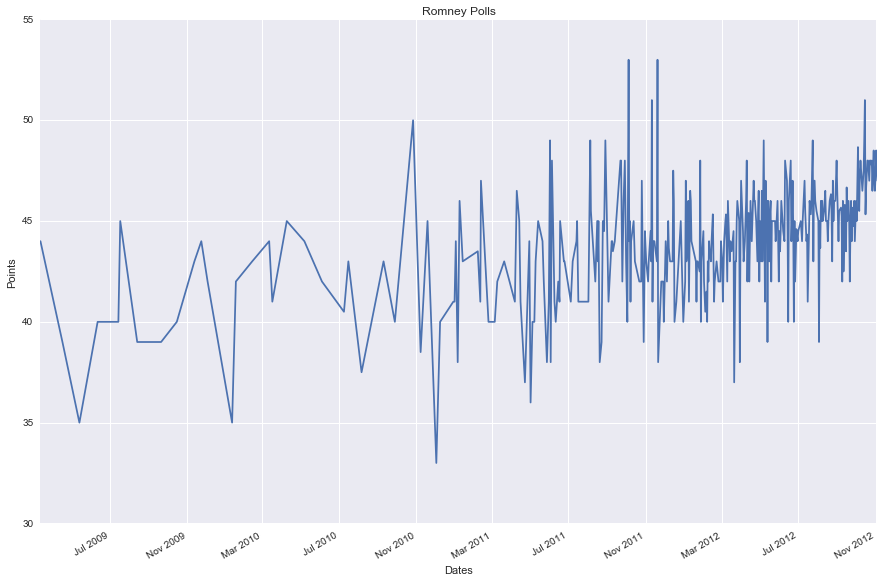

In [15]:
#Graph over time. I used 2 methods. The first one uses plot_date(), after i did combined polling results
#for pollsters with the same start date, averaging out different results into one. After that, I plotted
#a line graph using the unique dates and averaged result for each date.
#In the second graph, I just plotted out every point, without taking the average.
dates = matplotlib.dates.date2num(dates_list_formatted)
#plt.plot_date(dates, polls_avg_list, '-')
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot_date(dates, polls_avg_list, '-')
ax.xaxis_date()
fig.autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel('Points')
plt.title('Romney Polls')
plt.show()

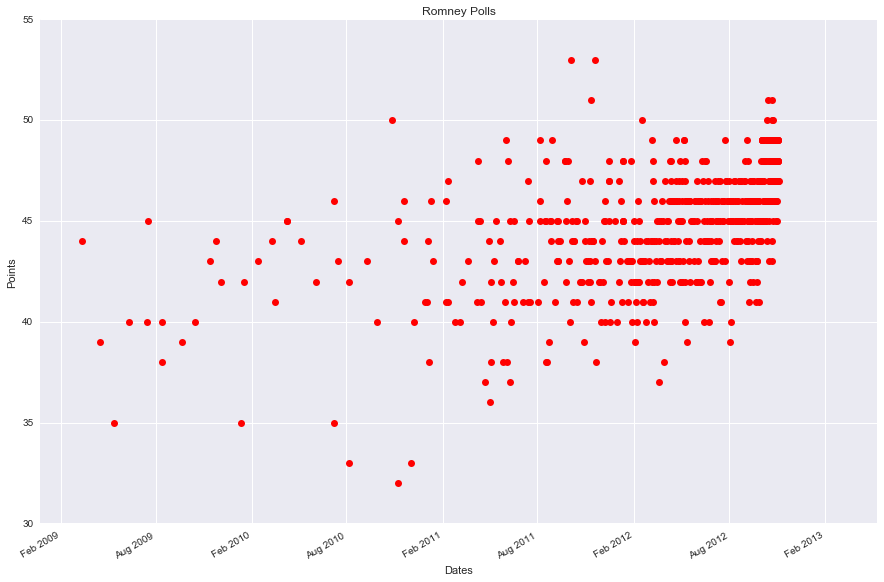

In [16]:
full_dates_list = []
for x in poll_df["Start Date"]:
    full_dates_list.append(datetime.strptime(x, '%Y-%m-%d'))
dates2 = matplotlib.dates.date2num(full_dates_list)
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(dates2, poll_df['Romney'], "ro")
ax.xaxis_date()
fig.autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel('Points')
plt.title('Romney Polls')
plt.show()